# DBSCAN Clustering with Scikit-Learn

This notebook demonstrates density-based clustering using the DBSCAN algorithm from scikit-learn on a synthetic geospatial dataset.

## 1. Introduction
We will generate a synthetic set of two-dimensional points and apply DBSCAN to discover clusters of arbitrary shape.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score

## 3. Generate Synthetic Data

In [2]:
# Generate two interleaving half circles (moons)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,0.622519,-0.372101
1,1.904269,-0.136303
2,-0.069431,0.456117
3,0.933899,0.237483
4,1.180360,-0.490847


## 4. Apply DBSCAN

In [3]:
# Fit DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)
df['Cluster'] = labels
unique_labels = set(labels)
print(f"Clusters found: {unique_labels}")

Clusters found: {0, 1}


## 5. Visualize Clusters

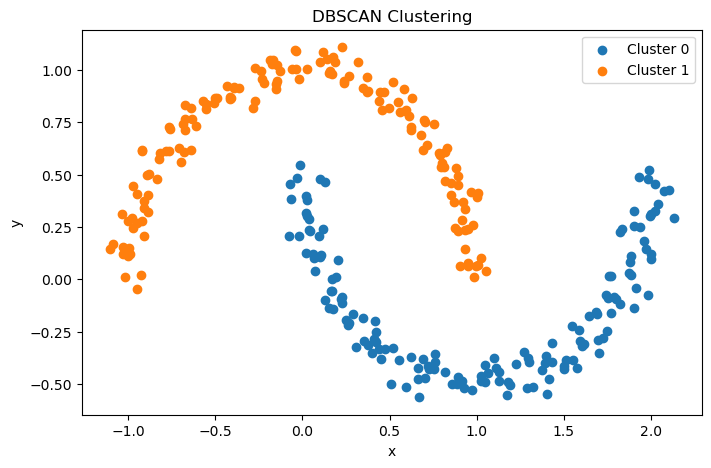

In [4]:
plt.figure(figsize=(8,5))
for label in unique_labels:
    subset = df[df['Cluster'] == label]
    marker = 'o' if label != -1 else 'x'
    plt.scatter(subset['x'], subset['y'], marker=marker, label=f'Cluster {label}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [5]:
# Calculate silhouette score
mask = labels != -1
score = silhouette_score(X[mask], labels[mask])
print(f"Silhouette Score (excluding noise): {score:.3f}")

Silhouette Score (excluding noise): 0.331


## 7. Conclusion
DBSCAN identifies clusters of arbitrary shape and marks noise points. Adjust `eps` and `min_samples` to refine clustering.